# Plasmid_data_analysis

Plasmid data analysis is a test jupyter noteboot to train into several python3 commands and data analysis tools:
    - urllib
    - pandas
    - matplotlib
    - etc.

First we need to download the file we are going to use from [ncbi](https://www.ncbi.nlm.nih.gov/) __FTP__ server:
[ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt](ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt).

For that we use urllib to retrieve the file containing all plasmid added to refseq database:

In [2]:
import sys

print(sys.version)

#sys.path.append('usr/local/share/jupyter/kernels')
sys.path.append('~/env36/lib/python3.6/site-packages/')

3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]


In [3]:
import urllib
import matplotlib
import pandas as pd

In [4]:
#Alternate way to download the file (would need to storage in in a file)
#url = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt'
#with urllib.request.urlopen(url) as plasmidurl:
#    plasmids = plasmidurl.read()

In [5]:
#faster way to store the database in a file
url = 'ftp://ftp.ncbi.nlm.nih.gov/genomes/GENOME_REPORTS/plasmids.txt'
urllib.request.urlretrieve(url, 'plasmid_ddbb.txt')

('plasmid_ddbb.txt', <email.message.Message at 0x7f92ccec5828>)

The file downloaded is a TSV (tab-separated value) file with all plasmids added to the refseq database, which looks like that:

In [4]:
with open("plasmid_ddbb.txt") as plasmid_ddbb:
    head = plasmid_ddbb.readlines()[0:10]
print(head)

['#Organism/Name\tKingdom\tGroup\tSubGroup\tPlasmid Name\tRefSeq\tINSDC\tSize (Kb)\tGC%\tProtein\trRNA\ttRNA\tOther RNA\tGene\tPseudogene\n', 'Acaryochloris marina MBIC11017\tBacteria\tTerrabacteria group\tCyanobacteria/Melainabacteria group\tpREB1\tNC_009926.1\tCP000838\t374.161\t47.3483\t309\t-\t-\t-\t333\t24\n', 'Acaryochloris marina MBIC11017\tBacteria\tTerrabacteria group\tCyanobacteria/Melainabacteria group\tpREB2\tNC_009927.1\tCP000839\t356.087\t45.3367\t336\t-\t-\t-\t360\t24\n', 'Acaryochloris marina MBIC11017\tBacteria\tTerrabacteria group\tCyanobacteria/Melainabacteria group\tpREB3\tNC_009928.1\tCP000840\t273.121\t45.1902\t250\t-\t-\t-\t290\t40\n', 'Acaryochloris marina MBIC11017\tBacteria\tTerrabacteria group\tCyanobacteria/Melainabacteria group\tpREB4\tNC_009929.1\tCP000841\t226.68\t45.877\t209\t-\t-\t-\t225\t16\n', 'Acaryochloris marina MBIC11017\tBacteria\tTerrabacteria group\tCyanobacteria/Melainabacteria group\tpREB5\tNC_009930.1\tCP000842\t177.162\t44.6755\t176\t-\t-\t

This prints the top 10 lines of the file.

To see the same information in a human readable format we use pandas. 
With head command, we can see the top 10 rows of a pandas dataframe

In [7]:
#Add the TSV file into a pandas DataFrame 
plasmid_df = pd.read_csv("plasmid_ddbb.txt", sep='\t', header=0)
#other parameters nrows=5

In [8]:
plasmid_df.head(10)

,#Organism/Name,Kingdom,Group,SubGroup,Plasmid Name,RefSeq,INSDC,Size (Kb),GC%,Protein,rRNA,tRNA,Other RNA,Gene,Pseudogene
0,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB1,NC_009926.1,CP000838,374.161,47.3483,309,-,-,-,333,24
1,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB2,NC_009927.1,CP000839,356.087,45.3367,336,-,-,-,360,24
2,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB3,NC_009928.1,CP000840,273.121,45.1902,250,-,-,-,290,40
3,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB4,NC_009929.1,CP000841,226.680,45.8770,209,-,-,-,225,16
4,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB5,NC_009930.1,CP000842,177.162,44.6755,176,-,-,-,179,3
5,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB6,NC_009931.1,CP000843,172.728,47.1267,152,-,-,-,165,13
6,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB7,NC_009932.1,CP000844,155.110,45.5909,130,-,-,-,136,6
7,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB8,NC_009933.1,CP000845,120.693,45.4185,103,-,-,-,109,6
8,Acaryochloris marina MBIC11017,Bacteria,Terrabacteria group,Cyanobacteria/Melainabacteria group,pREB9,NC_009934.1,CP000846,2.133,42.5223,2,-,-,-,3,1
9,Acetobacter aceti,Bacteria,Proteobacteria,Alphaproteobacteria,pAC5,NC_001275.1,AF110140,5.123,55.8657,2,-,-,-,2,-


In [9]:
#The function shape tell us the DF dimensions 
print('This database has %s plasmids with information of %s features:' %  plasmid_df.shape)
for feature in plasmid_df.columns:
    print("- " + feature)

This database has 14530 plasmids with information of 15 features:
- #Organism/Name
- Kingdom
- Group
- SubGroup
- Plasmid Name
- RefSeq
- INSDC
- Size (Kb)
- GC%
- Protein
- rRNA
- tRNA
- Other RNA
- Gene
- Pseudogene


In [10]:
plasmid_df.describe()

,Size (Kb),GC%
count,14530.000000,14530.000000
mean,110.860817,45.927032
std,240.551826,11.830250
min,0.537000,0.000000
25%,11.888750,35.925650
50%,48.748500,46.772900
75%,111.692750,54.073775
max,5836.680000,87.477300


# Drop NA to check if pandas takes "-" and "NaN" equally
The key fields are completelly filled. Fieds such 'rRNA', 'tRNA' or 'Other RNA' have many missing values. As an attemp to clean them we can make a copy and replace '-' for 'NaN' to find out if those missing values alter descriptive stats. We will find out later that this is __not__ the case.

In [ ]:
#plasmid_df['rRNA'].describe()

In [ ]:
#locate a specific plasmids
#plasmid_df.iloc[400]
#plasmid_df.iloc[0:400][['Kingdom', 'Size (Kb)']]
#plasmid_df['Plasmid Name']

In [13]:
#plasmid_missing = plasmid_df.copy()
#plasmid_na = plasmid_missing.replace('-', 'NaN')
#plasmid_na

In [ ]:
#print(plasmid_df['rRNA'].describe(), plasmid_na['rRNA'].describe())


# String manipulation
Plasmids are very promiscuous structuresthat can be transfered within different species so, to find a relationship within species and other feature, we first need to use only genus and species, not the fields supplied that includes the variety, interpreted as different organism.

We can do it easily with string manipulation.

In [14]:
plasmid_df[['#Organism/Name','Kingdom','Group','SubGroup']].describe()

,#Organism/Name,Kingdom,Group,SubGroup
count,14530,14530,14530,14530
unique,3236,4,22,57
top,Escherichia coli,Bacteria,Proteobacteria,Gammaproteobacteria
freq,1184,14217,8710,6297


In [15]:
plasmid_df['genus'] = plasmid_df['#Organism/Name'].str.split(' ').str[0]
plasmid_df['species'] = plasmid_df['#Organism/Name'].str.split(' ').str[1]
plasmid_df['Organism'] = plasmid_df['genus'] + " " + plasmid_df['species']

plasmid_df[['#Organism/Name','genus', 'species', 'Organism']].describe()

,#Organism/Name,genus,species,Organism
count,14530,14530,14530,14530
unique,3236,600,1250,1583
top,Escherichia coli,Escherichia,coli,Escherichia coli
freq,1184,1508,1520,1479


In [ ]:
What seemed to be 

In [50]:
len(plasmid_df['#Organism/Name'].unique())

3236

In [47]:
plasmid_df[['Organism', 'Size (Kb)']].groupby(['Organism'])['Size (Kb)'] \
.count() \
.reset_index(name='count') \
.sort_values(['count'], ascending=False) \
.head(10) #\
#.plot.bar(figsize=(20,5))

,Organism,count
521,Escherichia coli,1479
670,Klebsiella pneumoniae,1089
1237,Salmonella enterica,582
1321,Staphylococcus aureus,404
164,Bacillus thuringiensis,308
214,Borreliella burgdorferi,299
32,Acinetobacter baumannii,288
722,Lactobacillus plantarum,246
500,Enterococcus faecium,223
731,Lactococcus lactis,179


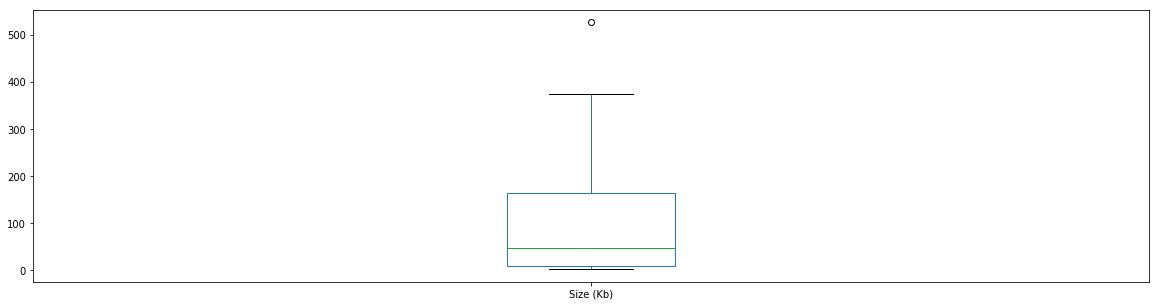

In [37]:
plasmid_df.iloc[0:200][['Group', 'Size (Kb)']].plot.box(figsize=(20,5))
#plasmid_df
#plasmid_size.colum = "Size"
#plasmid_size
#plasmid_size['double size'] = plasmid_df['Size (Kb)']*2

In [57]:
#See all plasmid longer than 4Mb
plasmid_df[plasmid_df['Size (Kb)'] > 4000]

,#Organism/Name,Kingdom,Group,SubGroup,Plasmid Name,RefSeq,INSDC,Size (Kb),GC%,Protein,rRNA,tRNA,Other RNA,Gene,Pseudogene
3719,Cronobacter sakazakii,Bacteria,Proteobacteria,Gammaproteobacteria,pCsaCS931a,-,CP027108,4194.43,57.0121,3869,22,70,12,4060,87
10530,Pseudomonas monteilii,Bacteria,Proteobacteria,Gammaproteobacteria,unnamed,NZ_CP014062.1,-,5836.68,61.8550,5209,22,79,4,5535,221
11911,Salmonella enterica subsp. enterica serovar Qu...,Bacteria,Proteobacteria,Gammaproteobacteria,punamed2,NZ_CP022019.1,-,4626.70,52.2113,4385,22,91,15,4666,153


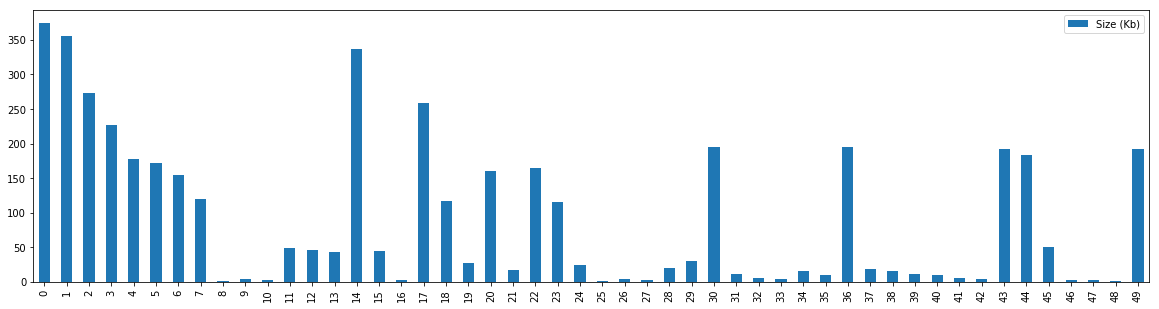

In [36]:
plasmid_df.iloc[0:50][['Kingdom', 'Size (Kb)']].plot.bar(figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f92acededa0>]],
      dtype=object)

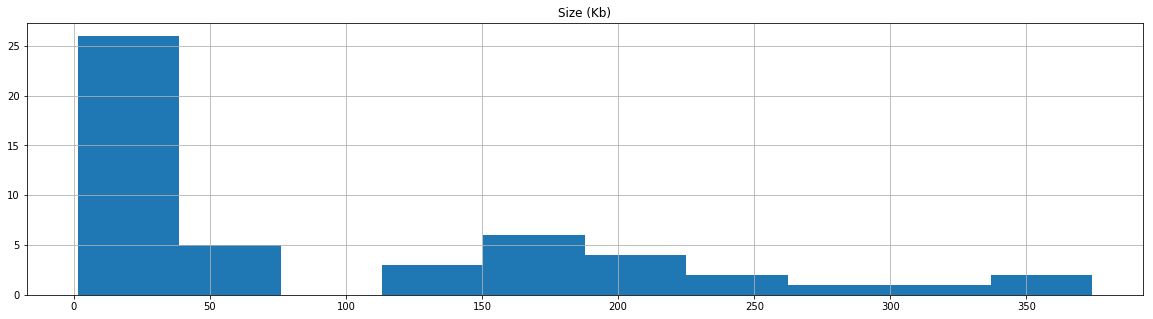

In [41]:
%matplotlib inline
#figsize=(x,y)
plasmid_df.iloc[0:50].hist(column='Size (Kb)', figsize=(20,5))

### Author: pedroscampoy@gmail.com
#### TUTORIAL UNDER CONSTRUCTION

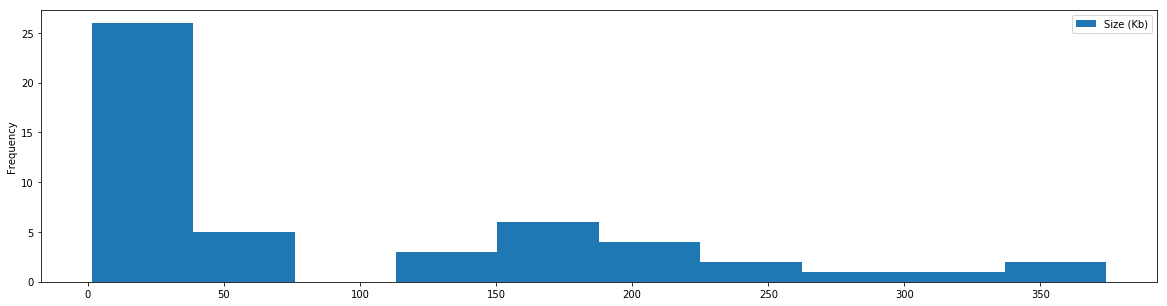

In [42]:
plasmid_df.iloc[0:50][['Kingdom', 'Size (Kb)']].plot.hist(figsize=(20,5))